# Computer Vision - Assignment 0 - Introduction to OpenCV

#### Bonus: 4 points   |   Due date: September 30, 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: JESUS MIGUEL ROJAS GOMEZ

The first step is to connect with Google Drive and import the suitable libraries. 

In [1]:
# We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive')
import os
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/MyDrive/images/',route)

Mounted at /content/drive


In [2]:
# We import the modules to use
import cv2
import numpy as np
from matplotlib import pyplot as plt
# With this backend, the output of plotting commands is displayed inline within 
# frontends like the Jupyter notebook, directly below the code cell that produced 
# it. The resulting plots will then also be stored in the notebook document.
# See https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

# Exercise 1

Write a function (`readIm`) that reads an image file and displays it either in grayscale or color. `flagColor` is the variable that determines whether the image is displayed in grayscale or color. Depending on the value of `flagColor` we will have a grayscale image (if `0`) or a color image (if `1`). By default, omitting the `flagColor` parameter makes it `flagColor=1` (color). Show that the function works correctly by displaying one grayscale and one color image. 

#### Solution



Si es una imagen en escala de grises, el segundo parametro de la función `imread` es 0; si no, si es una imagen a color, no tiene segundo parametro, ya que el parametro por defecto de `imread` es para leer imágenes a color.

In [3]:
def readIm(filename, flagColor=1):
  if (flagColor == 0):
    result = cv2.imread(filename,0)
  else:
    result = cv2.imread(filename)

  return result

We display the color version of the `logoOpenCV.jpg` image (three channels: RGB in matplotlib or BGR in OpenCV)

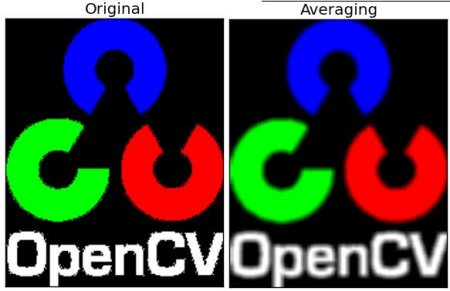

In [4]:
from google.colab.patches import cv2_imshow
im_color = readIm(get_image('logoOpenCV.jpg'), 1)
cv2_imshow(im_color)

We display the same image in grayscale (one channel)





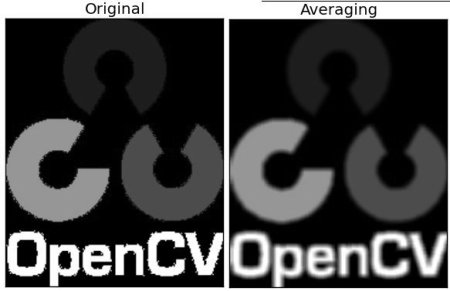

In [5]:
im_bn = readIm(get_image('logoOpenCV.jpg'),0)
cv2_imshow(im_bn)

---

# Exercise 2

Write a function that displays an array of arbitrary real numbers (that must include positive and negative values). This function should handle images with one and three bands/channels. You have to display visual examples with random images and real images in both scenarios, one-channel (grayscale) and three-channels (RGB). Hint: band values have to be shifted and scaled in the proper range ([0,1]) to avoid information loss.

#### Solution

Para la solución de este ejercicio, he definido una función `normalize` que, dada una imagen de una sola banda `im` un valor mínimo `MIN` y un valor máximo `MAX`, normaliza cada pixel de la imagen. Esta función sirve tanto para normalizar una imagen en escala de grises como para normalizar cada banda de una imagen a color.

In [ ]:
def normalize(im, MIN, MAX):
  im_out = np.zeros((im.shape[0],im.shape[1]))

  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      im_out[i,j] = ((im[i,j]-MIN)/(MAX-MIN))#*255

  return im_out

Esta función sirve para obtener la imagen normalizada, haciendo uso de la función definida anteriormente `normalize`:


*   Si `im` es una imagen en escala de grises, calculamos el valor máximo y mínimo de la imagen y normalizamos con esos valores.
*   Si `im` es una imagen a color:
    *    Si `flag_GLOBAL` es `True`, calculamos el máximo y el mínimo de la imagen completa (incluyendo los tres canales), y normalizamos cada banda con el máximo global de la imagen.
    *    Si `flag_GLOBAL` es `False`, calculamos el máximo y el mínimo de cada banda y normalizamos cada banda con dichos valores.

In [ ]:
def rangeDisplay01(im, flag_GLOBAL):
  #check image type (grayscale or color)
  if len(im.shape) == 3:
    color = True
  else:
    color = False

  MIN = np.min(im)
  MAX = np.max(im)
  
  if color == False:
    # normalize the grayscale image
    # compute range and apply normalization
    im_out = normalize(im, MIN, MAX)
  else:
    im_out = np.zeros((im.shape[0],im.shape[1],3))
    if flag_GLOBAL:
        im_out[:,:,0] = normalize(im[:,:,0], MIN, MAX)
        im_out[:,:,1] = normalize(im[:,:,1], MIN, MAX)
        im_out[:,:,2] = normalize(im[:,:,2], MIN, MAX)
    else:
      # normalize each band as a grayscale image
      for i in range(im.shape[0]):
        for j in range(im.shape[1]):
          MAXB = np.max(im[:,:,0])
          MINB = np.min(im[:,:,0])
          im_out[:,:,0] = normalize(im[:,:,0], MINB, MAXB)
          MAXG = np.max(im[:,:,1])
          MING = np.min(im[:,:,1])
          im_out[:,:,1] = normalize(im[:,:,1], MING, MAXG)
          MAXR = np.max(im[:,:,2])
          MINR = np.min(im[:,:,2])
          im_out[:,:,2] = normalize(im[:,:,2], MINR, MAXR)

  return im_out

Let's write a function to display any image  with a title

Al usar `matplotlib`, tenemos que hacer la conversión de BGR a RGB para que se muestren los colores correctamente. Esto lo realizamos con la línea:
```
plt.imshow(im_out.astype('uint8')[:,:,::-1])

```
También debemos hacer la conversión a `uint8` porque, si no, al haber realizado operaciones con float, la imagen aparecerá saturada a blanco.


In [ ]:
def displayIm(im, title='Result',factor= 1, showFlag=True):  
  # Normalize range
  im_out = rangeDisplay01(im, True)
  im_out = im_out[:,:]*255
  # Display the image
  if len(im_out.shape) == 3:
    # im has three channels
    plt.imshow(im_out.astype('uint8')[:,:,::-1])
  else:
    # im has a single channel
    plt.imshow(im_out, cmap='gray')

  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title) #adding title
  plt.xticks([]), plt.yticks([]) #axis label off
  if showFlag: plt.show()

Let's test this function using both RGB and gray level images

In [ ]:
rand_mono = (np.random.rand(50, 50)-0.5)*255
rand_multi = (np.random.rand(50, 50, 3)-0.5)*255

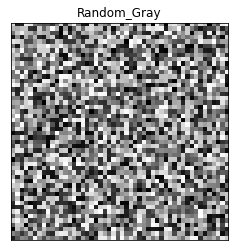

In [ ]:
displayIm(rand_mono,'Random_Gray')

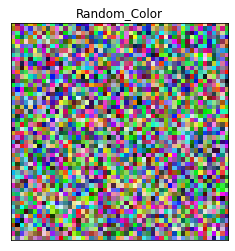

In [ ]:
displayIm(rand_multi, 'Random_Color')

Let's try with the real images given above. 

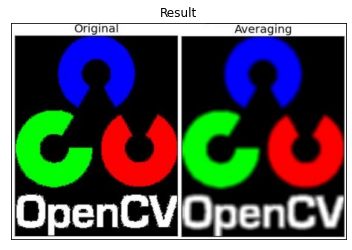

In [ ]:
displayIm(im_color)

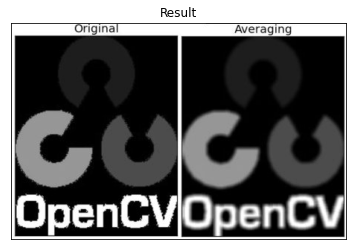

In [ ]:
displayIm(im_bn)

# Exercise 3

Write a function that takes as input a sequence/list of images (`vim`) and display them simultaneously on the same canvas. Consider the following cases: (a) images with the same size and number of channels, (b) images with different sizes but the same number of channels, and (c) images with different size and number of channels. Show visual examples of the three scenarios. 

#### Solution

Case (a): the student can concatenate the images by rows and columns using the numpy functions vstack() and hstack().

Case (b): Here a good policy could be to insert the largest image in the upper left corner of the canvas and add new images from the left along the bottom and diagonal iteratively.

Case (c): Convert all single-channel images to three-channel images and go to case (b).

Students are allowed to create two functions (`displayMI_ES` and `displayMI_NES`) to separately tackle scenarios (a) and (b)-(c), respectively. 

Para el caso (a), al tener las imágenes de `vim` el mismo tamaño y el mismo número de canales, he decidido mostrarlas en un cuadrado. Para ello, he redondeado al entero superior de la raiz del número de imágenes, para calcular el lado. Si este número antes de aplicar el redondeo no era exacto, esto significa que la última fila de imágenes estará incompleta, por lo que la he rellenado de imágenes en blanco del mismo tamaño para poder mostrar las imágenes.

In [ ]:
def displayMI_ES(vim, title, factor):
  # Let's start with case (a). We concatenate the images by columns, or by rows 
  # and columns, depending on the number of images and their dimensions
  nim = len(vim)
  side = int(np.ceil(np.sqrt(nim)))

  listh = []
  listv = []

  for i in range(side):
    for j in range(side):
      if (nim > i*side+j):
        listh.append(vim[i*side+j])
      else: 
        listh.append(np.ones(vim[0].shape)*255)
    listv.append(np.hstack(listh))
    listh = []

  out = np.vstack(listv)

  return displayIm(out,title,factor)

Let's display two different configurations

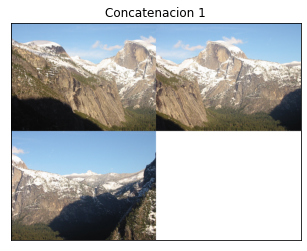

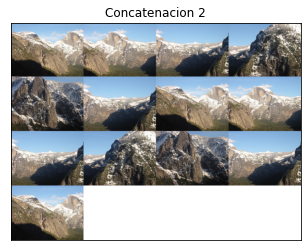

In [ ]:
imcolor_1 = readIm(get_image('yosemite1.jpg'))
imcolor_2 = readIm(get_image('yosemite2.jpg'))
imcolor_3 = readIm(get_image('yosemite3.jpg'))
imcolor_4 = readIm(get_image('yosemite4.jpg'))
imcolor_5 = readIm(get_image('yosemite5.jpg'))
vim=[imcolor_1, imcolor_2, imcolor_3]
displayMI_ES(vim, 'Concatenacion 1', 1)
vim=[imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1]
displayMI_ES(vim, 'Concatenacion 2', 1)

Let us now consider the case of images with different sizes but the same number of channels. We can start by placing the first (the largest) in the top-left corner. Then we concatenate by columns and rows the rest of images.

Para abordar el caso (c), imágenes con distinto tamaño y número de canales, he definido la función `threeband`, que dada una lista de imágenes a color y en escala de grises (es decir, de tres y un canal), transforma las imágenes de un canal a tres canales, preservando las imágenes en escala de grises. Esto se consigue copiando el valor de un pixel en la escala de grises a los tres canales de ese mismo pixel.

In [ ]:
def threeband(vim):
  out = []
  for elem in vim:
    if (len(elem.shape) == 3):
      out.append(elem)
    else:
      imgray = np.zeros((elem.shape[0],elem.shape[1],3))
      imgray[:,:,0] = elem[:,:]
      imgray[:,:,1] = elem[:,:]
      imgray[:,:,2] = elem[:,:]
      out.append(imgray)
  
  return out

Una vez definida esta función, podemos abordar los casos (b) y (c). Para ello, dada una lista de imágenes en escala de grises y a color, mediante la función `threeband` la convertiremos en una lista de imágenes a tres canales (`vimtb`). Una vez hemos obtenido esto, ordenaremos de mayor a menor esa lista de imágenes.

El algoritmo consiste en lo siguiente. Tomaremos como referencia de imágenes en la primera fila el entero superior de la raiz cuadrada del número de imágenes de entrada. Como estas están ordenadas de mayor a menor, la primera fila delimitará el ancho del lienzo. Esta primera fila se construirá del siguiente modo:

*    Como las imágenes están ordenadas de mayor a menor, la primera imagen delimitará el número de filas de la primera fila. Introducimos las imágenes a la derecha de esta hasta llegar a `side` número de imagenes. Si el número de filas de las imágenes sucesivas no coincide con el número de filas de la imagen más grande, completaremos la diferencia de píxeles con blanco. La suma de todas las columnas de la primera fila de imágenes determinará el valor de `maxcolumn`.
*    Una vez completada la primera fila, y teniendo en cuenta de nuevo que las imágenes están ordenadas de mayor a menor, iremos introduciendo imágenes en una nueva fila, siguiendo el mismo procedimiento: si el número de filas no coincide con el de la primera imagen de la fila, completaremos con píxeles blancos. Si la siguiente imagen que vamos a insertar en la fila hace que el número de columnas de esa fila supere el valor de `maxcolumn`, completaremos con píxeles blancos hasta `maxcolumn` e iniciaremos una nueva fila.

Procederemos así hasta terminar el número de imágenes en la lista de entrada dada.


In [ ]:
def displayMI_NES(vim):
  vimtb = threeband(vim)
  ovim = vimtb

  # ordenamos de mayor a menor la lista de imágenes
  intercambio = True
  while intercambio:
    intercambio = False
    for i in range(len(ovim)-1):
      if (ovim[i].shape[0] < ovim[i+1].shape[0] and ovim[i].shape[1] <= ovim[i+1].shape[1]):
        ovim[i], ovim[i+1] = ovim[i+1], ovim[i]
        intercambio = True
      else:
        if (ovim[i].shape[1] < ovim[i+1].shape[1]):
          ovim[i], ovim[i+1] = ovim[i+1], ovim[i]
          intercambio = True

  # let's define the size of the canvas
  # la idea es hacer una fila con las imágenes más grandes y que el largo de esas imágenes sea maxcolumn,
  # después, ir añadiendo imágenes debajo de esas hasta llegar al final: si la imagen que vamos a añadir
  # sobrepasa maxcolumn, completamos con blanco y saltamos a la siguiente fila
  # Al estar las imágenes ordenadas de mayor a menor, siempre el numero de filas de la primera imagen de
  # cada fila es mayor o igual que el de las siguientes, por lo que si al añadir una imagen a una fila, el número 
  # de filas es menor, completamos con blanco verticalmente hasta que sean del mismo numero de filas

  maxrow = ovim[0].shape[0] # define el número de filas de la primera fila de imágenes, este será modificado 
                            # conforme añadimos filas
  maxcolumn = 0
  nim = len(ovim)
  side = int(np.ceil(np.sqrt(nim)))

  listv = []
  listh = []

  # creamos la primera fila de imágenes y actualizamos el valor de maxcolumn
  for i in range(side):
    if (len(ovim)!=0):
      if (ovim[i].shape[0] == maxrow):
        listh.append(ovim[i])
        maxcolumn += ovim[i].shape[1]
      else:
        aux = [ovim[i], np.ones((maxrow-ovim[i].shape[0], ovim[i].shape[1],3))*255]
        listh.append(np.vstack(aux))
        maxcolumn += ovim[i].shape[1]

  listv.append(np.hstack(listh))
  listh = []
  maxrowactual = 0  # este parámetro indica el tamaño de la fila de imágenes actual

  i = side
  j = 0
  seguir = True
  if (i >= len(ovim)):
    seguir = False

  # vamos completando las siguientes filas; si al añadir una imagen sobrepasa maxcolumn, completamos 
  # con blanco e iniciamos una fila de imágenes nueva
  while (seguir):
    maxrowactual = ovim[i].shape[0]
    maxrow += maxrowactual
    while ovim[i].shape[1] + j < maxcolumn and seguir:
      elem = ovim[i]
      if (maxrowactual == elem.shape[0]):
        listh.append(elem)
        j += elem.shape[1]
      else:
        aux = [elem, np.ones((maxrowactual-elem.shape[0], elem.shape[1],3))*255]
        listh.append(np.vstack(aux))
        j += elem.shape[1]
      i += 1
      if i == len(ovim):
        seguir = False
        i = 0
    # completamos hasta maxcolumn con blanco
    listh.append(np.ones((maxrowactual, maxcolumn-j,3))*255)
    listv.append(np.hstack(listh))
    j = 0
    listh = []

  # unimos todas las filas
  outIm = np.vstack(listv)
  
  return outIm[0:maxrow,0:maxcolumn,:]

Ponemos a prueba el apartado (b) con el siguiente ejemplo:

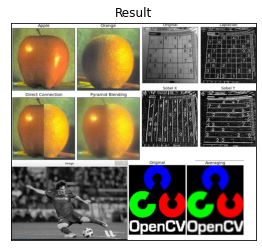

In [ ]:
imcolor_1 = readIm(get_image('dave.jpg'))
imcolor_2 = readIm(get_image('logoOpenCV.jpg'))
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'))
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1]
outIm=displayMI_NES(vim)
displayIm(outIm)

Y ahora ponemos a prueba el apartado (c):

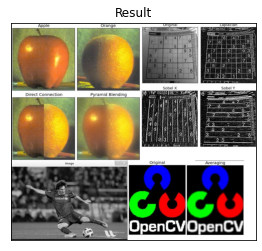

In [ ]:
imcolor_1 = readIm(get_image('dave.jpg'),0)
imcolor_2 = readIm(get_image('logoOpenCV.jpg'))
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'),0)
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1]
outIm=displayMI_NES(vim)
displayIm(outIm)

# Exercise 4

Write a function that modifies the color in an image for each of the pixel coordinates included in a list. Specifically, students must insert a green square with a side of 50 pixels in the center of the image. The key idea of this exercise is to understand how to modify the pixel values in an image (a 2D spatial array of pixels, where each pixel is defined by one (illumination in grayscale) or three values (RGB-color)).

#### Solution



Para la solución de este ejercicio, he asumido que `nv` es un vector de nuevos valores en tres canales (es decir, cada coordenada de `nv` contiene un vector con tres valores). En caso de ser incorrecta esta suposición, habría que comprobar si `im` es una imagen en escala de grises o a color, y si cada valor de `nv` contiene uno o tres valores. Suponiendo esto no es necesario realizar estas comprobaciones.

Para resolver el ejercicio, en primer lugar he convertido la imagen de entrada de un canal a tres canales, mediante la función definida anteriormente. Entonces, por cada coordenada contenida en `cp`, sustituyo el valor correspondiente por el de `nv`.

Para calcular las coordenadas del cuadrado a introducir, he obtenido el centro de la imagen (`centerx`,`centery`) y he introducido las coordenadas por filas desde `centerx-side/2` hasta `centerx+side/2`. Para que este sea de color verde, todas las 3-uplas de valores de `nv` contienen `[0,255,0]`.

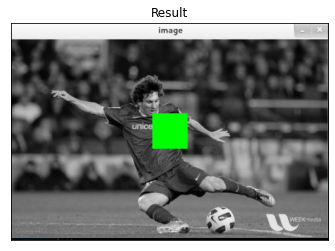

In [ ]:
def changePixelValues(im,cp,nv):
  # cp is a vector of pixel coordinates
  # nv is a vector with the new values
  # replace the values of cp with the nv values
  imtb = threeband([im])[0]

  for i in range(len(cp)):
    imtb[int(cp[i][0]),int(cp[i][1]),0] = nv[i][0]
    imtb[int(cp[i][0]),int(cp[i][1]),1] = nv[i][1]
    imtb[int(cp[i][0]),int(cp[i][1]),2] = nv[i][2]

  displayIm(imtb)


im = readIm(get_image('messi.jpg'))
# create the list of points with the requested shape
# cuadrado de 50x50 en el centro
side = 50
centerx = int(im.shape[0]/2)
centery = int(im.shape[1]/2)
cp = []
nv = []

for i in range(side):
  for j in range(side):
    if side % 2 == 0:
      cp.append([centerx-side/2+i,centery-side/2+j])

for i in range(side):
  for j in range(side):
    nv.append([0,255,0])

changePixelValues(im,cp,nv) 

---

# Exercise 5

Write a function (`print_images_titles`) able to display multiple images, within the same canvas, including specific titles for each one of them. The main novelty of this exercise, with respect to Exercise 3, is the fact of adding a title for each subimage. `print_images_titles` is fed with a list of images and a list of titles. `matplotlib` functions like `add_subplot` or `subplot` can help in this regard.

#### Solution

Para resolver este ejercicio, primero he calculado el número de columnas del lienzo, redondeando al entero superior de la división entre el número de imágenes y el número de filas pasado como argumento (`rows`). Una vez calculado `columns` hacemos uso de la función `subplots` para generar un espacio de `rows`x`columns` imágenes. Por cada espacio en nuestro lienzo, incluimos una imagen con su título. Si sigue habiendo espacios en el lienzo pero no disponemos de más imágenes, eliminamos los ejes para mayor claridad en la representación.

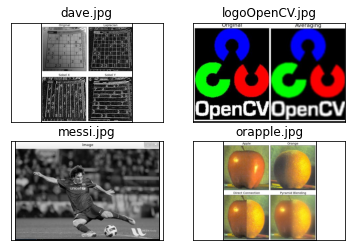

In [ ]:
def print_images_titles(vim, titles=None, rows=2):
  vimtb = threeband(vim)
  columns = int(np.ceil(len(vimtb)/rows))
  fig, axs = plt.subplots(rows, columns)

  axs = axs.flatten()
  for i,ax in zip(range(rows*columns),axs):
    if i < len(vimtb):
      fig.add_subplot(rows,columns,i+1)
      plt.imshow(vimtb[i].astype('uint8')[:,:,::-1])
      if titles != None and i < len(titles):
        ax.title.set_text(titles[i])
      ax.set_xticks([]), ax.set_yticks([])
      plt.xticks([]), plt.yticks([])
    else:
      plt.delaxes(ax)  

im1 = readIm(get_image('dave.jpg'))
im2 = readIm(get_image('logoOpenCV.jpg'))
im3 = readIm(get_image('messi.jpg'))
im4 = readIm(get_image('orapple.jpg'))

vim = [im1, im2, im3, im4]    
titles = ['dave.jpg','logoOpenCV.jpg','messi.jpg','orapple.jpg',]

print_images_titles(vim, titles)